In [2]:
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from utils.generate_phrases import generate_random_phrase, alphabet

In [3]:
# Time Analysis
phrase_size = int(1e2)

t1 = time.time()
new_phrase = generate_random_phrase(phrase_size, alphabet)
t2 = time.time()

print(f"Took {t2 - t1} seconds to generate a phrase with {phrase_size} letters using sequential")

# t1 = time.time()
# new_phrase = generate_random_phrase(phrase_size, alphabet, parallel=True)
# t2 = time.time()

# print(f"Took {t2 - t1} seconds to generate a phrase with {phrase_size} letters using parallel")

Took 0.0001933574676513672 seconds to generate a phrase with 100 letters using sequential


In [4]:
def generate_phrases(phrase:str, log_gen:bool=False):
    for letter in phrase:
        if letter not in alphabet:
            raise ValueError(f"Letter {letter} not in alphabet")
    
    phrase_size = len(phrase)
    gen:int = 0
    while True:
        new_phrase = generate_random_phrase(phrase_size, alphabet)
        gen += 1
        
        if new_phrase == phrase:
            break

        if gen % 100000 == 0 and log_gen:
            print(f'Generation: {gen:,}')
    
    return gen

Found "G" in 4 generations
Found "GA" in 7 generations
Found "GAG" in 75 generations
Found "GAGC" in 31 generations
Found "GAGCC" in 970 generations
Found "GAGCCC" in 4,933 generations
Took 0.023919105529785156 seconds to find all the phrases


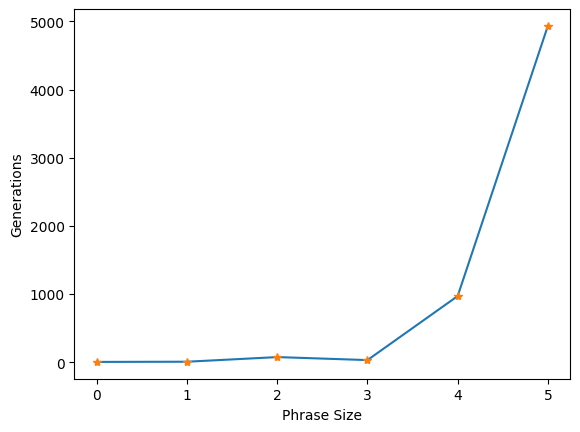

In [5]:
# phrase = 'banan'
phrase = 'GAGCCC'#TCAATCAGGCATACC'

phrase_i = ''
gens = []

t1 = time.time()
for letter in phrase:
    phrase_i += letter
    gen = generate_phrases(phrase_i)

    gens.append(gen)
    print(f'Found "{phrase_i}" in {gen:,} generations')
t2 = time.time()

print(f"Took {t2 - t1} seconds to find all the phrases")

plt.plot(gens)
plt.plot(gens, '*')
plt.xlabel('Phrase Size')
plt.ylabel('Generations')
plt.show()

In [6]:
# phrase = 'bana'
phrase = 'GAGCCC'#TCAATCAGGCA'#TACC'
size_exp = 30

gens_list = []
for i in range(size_exp):
    t1 = time.time()
    gen = generate_phrases(phrase)
    t2 = time.time()

    gens_list.append(gen)
    print(f'Found "{phrase}" in {gen:,} generations and took {round(t2 - t1, 4):,} seconds')

med_gen = np.mean(gens_list)

print(f'Mean generations: {med_gen:,}')

Found "GAGCCC" in 624 generations and took 0.0023 seconds
Found "GAGCCC" in 7,313 generations and took 0.0283 seconds
Found "GAGCCC" in 965 generations and took 0.0039 seconds
Found "GAGCCC" in 533 generations and took 0.0026 seconds
Found "GAGCCC" in 816 generations and took 0.004 seconds
Found "GAGCCC" in 1,257 generations and took 0.0045 seconds
Found "GAGCCC" in 2,058 generations and took 0.0075 seconds
Found "GAGCCC" in 1,567 generations and took 0.0053 seconds
Found "GAGCCC" in 2,326 generations and took 0.008 seconds
Found "GAGCCC" in 8,218 generations and took 0.0276 seconds
Found "GAGCCC" in 2,990 generations and took 0.011 seconds
Found "GAGCCC" in 807 generations and took 0.0026 seconds
Found "GAGCCC" in 4,759 generations and took 0.016 seconds
Found "GAGCCC" in 6,074 generations and took 0.0202 seconds
Found "GAGCCC" in 649 generations and took 0.0022 seconds
Found "GAGCCC" in 673 generations and took 0.0024 seconds
Found "GAGCCC" in 12,532 generations and took 0.042 second

        Generations
count     30.000000
mean    3864.533333
std     3829.073227
min      190.000000
25%      809.250000
50%     2192.000000
75%     6067.750000
max    12775.000000


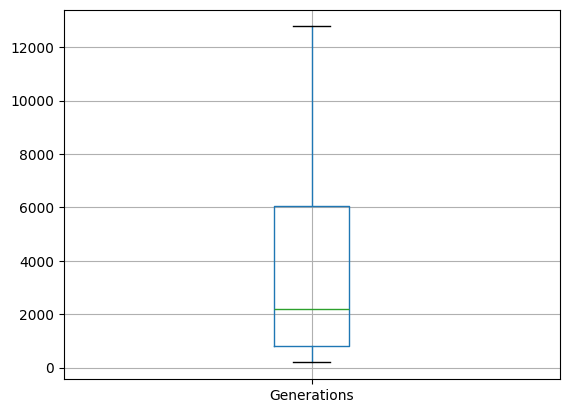

In [7]:
# Add Boxplot
d = {
    "Generations": gens_list
}

df = pd.DataFrame(d)

print(df.describe())

df.boxplot()
plt.show()